In [1]:
import xgi
import nx_hif
import hypernetx as hnx
import hypergraphx as hgx
import networkx as nx
import numpy as np

# Create a hypergraph in HypergraphX and use in other libraries

HypergraphX will create an HIF-compliant file which other libraries can then read.

In [12]:
H = hgx.Hypergraph([[1, 2, 3], [4, 5, 6]])
# H.write_hif("data/small_hypergraph.json")

# Create a hypergraph in HyperNetX and use in other libraries

HyperNetX will create an HIF-compliant file which other libraries can then read.

In [13]:
lesmis = hnx.utils.toys.LesMis()
names = lesmis.df_names
scenes = lesmis.df_scenes
scenes["edges"] = [
    ".".join([str(scenes.loc[idx][col]) for col in scenes.columns[:-2]])
    for idx in scenes.index
]
scenes["nodes"] = scenes["Characters"]

df = scenes[["edges", "nodes"]]
cell_weights = df.groupby(["edges"]).count().to_dict()["nodes"]
df["weights"] = df.edges.map(lambda e: np.round(1 / cell_weights.get(e, 1), 2))

nprops = names
nprops["weights"] = np.round(np.random.uniform(0, 1, len(names)), 2)
nprops

H = hnx.Hypergraph(
    df,
    cell_weight_col="weights",
    node_properties=nprops,
    node_weight_prop_col="weights",
)
# H.write_hif("lesmis.json")

/opt/miniconda3/envs/xgi/lib/python3.12/site-packages/hypernetx/utils/toys/lesmis.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  self.book_tour_data = self.df_scenes.groupby(["Volume", "Book"]).apply(
/var/folders/12/5tnqqv2d58qb9hs_fcf9tcdh0000gp/T/ipykernel_36386/1799623671.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["weights"] = df.edges.map(lambda e: np.round(1 / cell_weights.get(e, 1), 2))


# Create a bipartite network in NetworkX and use in other libraries

NetworkX will create an HIF-compliant file which other libraries can then read.

/home/mcoll/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x7fa6e0d71c40>,
  <matplotlib.collections.PatchCollection at 0x7fa6e0dad3d0>))

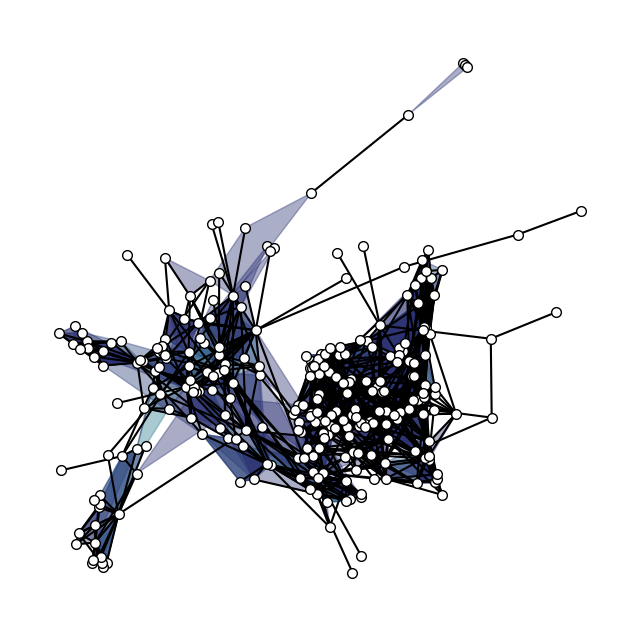

In [2]:
G = nx_hif.read_hif("data/email-enron.json")
H = xgi.from_bipartite_graph(G)
H = H.cleanup()
xgi.draw(H)

# Create a hypergraph in SimpleHypergraphs.jl and use in other libraries

SimpleHypergraphs.jl will create an HIF-compliant file which other libraries can then read.

# Create a hypergraph in XGI and use in other libraries

XGI will create an HIF-compliant file which other libraries can then read.

In [ ]:
H = xgi.load_xgi_data("email-enron")  # load a dataset from XGI-DATA
xgi.write_hif(H, "data/email-enron.json")  # write that dataset to HIF